# plotting functions of supplmentary figure 2 in the manuscript
This figure shows the following:
- 3D recsonstruction of spike protein, dataset simulated with radiation damage
- FSC curve belonging to the 3D reconstruction
- example micrograph of a dataset with radiation damage
- example micrograph of a dataset without radiation damage
- boxplot showing the particle picking precision as a function of exposure
- boxplot showing the particle picking recall as a function of exposure

In [1]:
# imports
import os
import mrcfile
import yaml
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pipeliner.mrc_image_tools import mrc_thumbnail
from gemmi import cif
from roodmus.analysis.utils import load_data
from tqdm import tqdm

## panel A
need to flip the handedness of the map and the local resolution mask

In [2]:
project_dir = "/home/mjoosten1/projects/roodmus/data/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated"
refined_map = os.path.join(project_dir, "Refine3D", "job048", "run_class001.mrc")
locres_mask = os.path.join(project_dir, "LocalRes", "job061", "relion_locres.mrc")
postprocess_map = os.path.join(project_dir, "PostProcess", "job050", "postprocess.mrc")

with mrcfile.open(refined_map, mode='r') as mrc:
    refined_map_data = mrc.data

with mrcfile.new(refined_map.replace(".mrc", "_flipped.mrc"), overwrite=True) as mrc:
    mrc.set_data(np.flip(refined_map_data, axis=0).astype(np.float32))


with mrcfile.open(locres_mask, mode='r') as mrc:
    locres_mask_data = mrc.data

with mrcfile.new(locres_mask.replace(".mrc", "_flipped.mrc"), overwrite=True) as mrc:
    mrc.set_data(np.flip(locres_mask_data, axis=0).astype(np.float32))

with mrcfile.open(postprocess_map, mode='r') as mrc:
    postprocess_map_data = mrc.data

with mrcfile.new(postprocess_map.replace(".mrc", "_flipped.mrc"), overwrite=True) as mrc:
    mrc.set_data(np.flip(postprocess_map_data, axis=0).astype(np.float32))


## panel A
plotting the micrograph with radiation damage

100%|██████████| 67/67 [00:19<00:00,  3.48it/s]


found micrograph: /home/mjoosten1/projects/roodmus/data/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/MotionCorr/job007/Movies/000065.mrc
defocus: -19794.56395994216


(-0.5, 511.5, 511.5, -0.5)

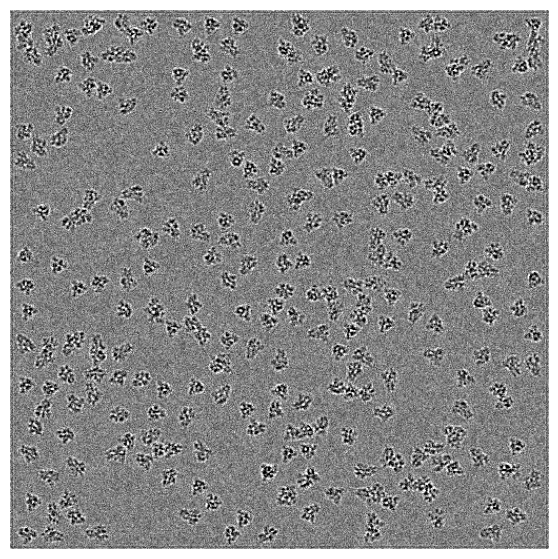

In [2]:
project_dir = "/home/mjoosten1/projects/roodmus/data/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated"
figures_dir = os.path.join(project_dir, "figures")
ugraph_dir = os.path.join(project_dir, "MotionCorr", "job007", "Movies")
movies_dir = os.path.join(project_dir, "Movies")
# ugraph_files = [os.path.join(ugraph_dir, f) for f in os.listdir(ugraph_dir) if f.endswith(".mrc") and "PS" not in f]

# need to look through the config files to find a micrograph with defocus close to target
config_files = [os.path.join(movies_dir, f) for f in os.listdir(movies_dir) if f.endswith(".yaml")]
target_defocus = -20000
best_idx = 0
current_defocus = 0
for config_file in tqdm(config_files):
    config = yaml.load(open(config_file, "r"), Loader=yaml.FullLoader)
    defocus = config["microscope"]["lens"]["c_10"]
    if abs(defocus - target_defocus) < abs(current_defocus - target_defocus):
        current_defocus = defocus
        best_idx = config_files.index(config_file)

config_file = config_files[best_idx]
ugraph_file = os.path.join(ugraph_dir, os.path.basename(config_file.replace(".yaml", ".mrc")))

print(f"found micrograph: {ugraph_file}")
print(f"defocus: {current_defocus}")

ugraph_thumbnail = mrc_thumbnail(ugraph_file, 512, os.path.join(figures_dir, f"{ugraph_file.replace('.mrc', '_thumbnail')}.png"))

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(ugraph_thumbnail, cmap="gray")
ax.axis("off")

## panel B
plotting the micrograph without radiation damage

100%|██████████| 900/900 [05:20<00:00,  2.81it/s]


found micrograph: /tudelft/mjoosten1/staff-umbrella/ajlab/MJ/projects/Roodmus/data/DE-Shaw_covid_spike_protein/DESRES-Trajectory_sarscov2-11021571-all-glueCA/Micrographs/000675.mrc
defocus: -20007.904507381565


(-0.5, 511.5, 511.5, -0.5)

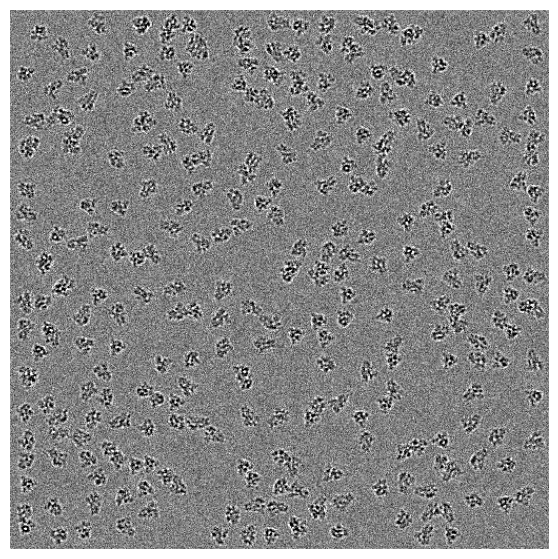

In [3]:
project_dir = "/tudelft/mjoosten1/staff-umbrella/ajlab/MJ/projects/Roodmus/data/DE-Shaw_covid_spike_protein/DESRES-Trajectory_sarscov2-11021571-all-glueCA"
figures_dir = os.path.join(project_dir, "figures")
ugraph_dir = os.path.join(project_dir, "Micrographs")
# ugraph_files = [os.path.join(ugraph_dir, f) for f in os.listdir(ugraph_dir) if f.endswith(".mrc")]

# need to look through the config files to find a micrograph with defocus close to target
config_files = [os.path.join(ugraph_dir, f) for f in os.listdir(ugraph_dir) if f.endswith(".yaml")]
target_defocus = -20000
best_idx = 0
current_defocus = 0
for config_file in tqdm(config_files):
    config = yaml.load(open(config_file, "r"), Loader=yaml.FullLoader)
    defocus = config["microscope"]["lens"]["c_10"]
    if abs(defocus - target_defocus) < abs(current_defocus - target_defocus):
        current_defocus = defocus
        best_idx = config_files.index(config_file)

config_file = config_files[best_idx]
ugraph_file = os.path.join(ugraph_dir, os.path.basename(config_file.replace(".yaml", ".mrc")))

print(f"found micrograph: {ugraph_file}")
print(f"defocus: {current_defocus}")

ugraph_thumbnail = mrc_thumbnail(ugraph_file, 512, os.path.join(figures_dir, f"{ugraph_file.replace('.mrc', '_thumbnail')}.png"))

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(ugraph_thumbnail, cmap="gray")
ax.axis("off")


## Not in figure anymore
plotting the FSC curve

saved figure to: /home/mjoosten1/projects/roodmus/data/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/figures/job050_FSC.pdf


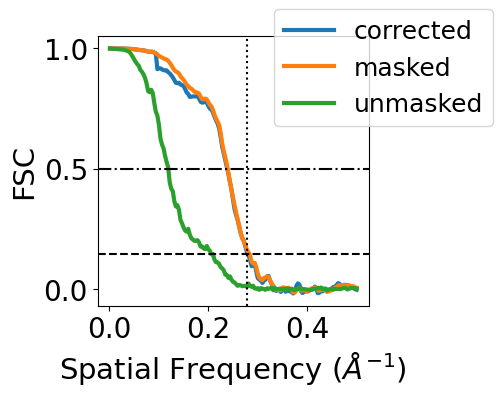

In [4]:
project_dir = "/home/mjoosten1/projects/roodmus/data/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated"
figures_dir = os.path.join(project_dir, "figures")
job = "job050"
fsc_postprocess_filename = os.path.join(project_dir, "PostProcess", job, "postprocess.star")
resolution = 3.6


fsc_cif = cif.read(fsc_postprocess_filename).find_block("fsc")
rlnResolution = fsc_cif.find_loop("_rlnResolution")
rlnFourierShellCorrelationCorrected = fsc_cif.find_loop("_rlnFourierShellCorrelationCorrected")
rlnFourierShellCorrelationParticleMaskFraction = fsc_cif.find_loop("_rlnFourierShellCorrelationParticleMaskFraction")
rlnFourierShellCorrelationUnmaskedMaps = fsc_cif.find_loop("_rlnFourierShellCorrelationUnmaskedMaps")
rlnFourierShellCorrelationMaskedMaps = fsc_cif.find_loop("_rlnFourierShellCorrelationMaskedMaps")
rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps = fsc_cif.find_loop("_rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps")

df = pd.DataFrame({
    "resolution": rlnResolution,
    "fsc": rlnFourierShellCorrelationCorrected,
    "fsc_masked": rlnFourierShellCorrelationMaskedMaps,
    "fsc_unmasked": rlnFourierShellCorrelationUnmaskedMaps,
    "fsc_masked_random": rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps,
    "fsc_masked_fraction": rlnFourierShellCorrelationParticleMaskFraction,
})

# convert all columns to float
for column in df.columns:
    df[column] = df[column].astype(float)

fig, ax = plt.subplots(figsize=(3.5, 3.5))
sns.lineplot(x="resolution", y="fsc", data=df, ax=ax, legend=True, label="corrected", linewidth=3)
sns.lineplot(x="resolution", y="fsc_masked", data=df, ax=ax, legend=True, label="masked", linewidth=3)
sns.lineplot(x="resolution", y="fsc_unmasked", data=df, ax=ax, legend=True, label="unmasked", linewidth=3)
ax.axhline(0.143, color="black", linestyle="--")
ax.axhline(0.5, color="black", linestyle="-.")
ax.axvline(1/resolution, color="black", linestyle="dotted")
ax.set_xlabel("Spatial Frequency ($\AA^{-1}$)", fontsize=21)
ax.set_ylabel("FSC", fontsize=21)
# ax.set_ylim((-0.1, 1.25))
# change the fontsize of the ticks and the legend
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend(fontsize=18, bbox_to_anchor=(0.65, 1.1), loc=2, borderaxespad=0.)

outfilename = os.path.join(figures_dir, f"{job}_FSC.pdf") 
# fig.savefig(outfilename, bbox_inches="tight")
print(f"saved figure to: {outfilename}")


## panel D
plotting the boxplot of particle picking precision as a function of exposure

In [24]:
project_dir = "/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison"
figures_dir = os.path.join(project_dir, "figures")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True # prints out progress statements
ignore_missing_files = True # if .mrc files are missing, the analysis will still be performed
enable_tqdm = True # enables tqdm progress bars

data = {
    0: {
        "exposure": 45,
        "LoG": "job004",
        "Class2D": "job005",
        "topaz": "job010",
        "homogeneous": "job016"
    },
    1: {
        "exposure": 35,
        "LoG": "job037",
        "Class2D": "job038",
        "topaz": "job042",
        "homogeneous": "job048"
    },
    2: {
        "exposure": 25,
        "LoG": "job054",
        "Class2D": "job055",
        "topaz": "job059",
        "homogeneous": "job065"
    },
    3: {
        "exposure": 15,
        "LoG": "job071",
        "Class2D": "job072",
        "topaz": "job076",
        "homogeneous": "job082"
    },
    4: {
        "exposure": 5,
        "LoG": "job088",
        "Class2D": "job089",
        "topaz": None,
        "homogeneous": None
    },
    5: {
        "exposure": 10,
        "LoG": "job093",
        "Class2D": "job094",
        "topaz": None,
        "homogeneous": None
    },
    6: {
        "exposure": 12,
        "LoG": "job098",
        "Class2D": "job099",
        "topaz": None,
        "homogeneous": None
    },
        7: {
        "exposure": 8,
        "LoG": "job114",
        "Class2D": "job115",
        "topaz": None,
        "homogeneous": None,
    },
}

for key, item in data.items():
    exposure = f"{item['exposure']}".zfill(2)
    config_dir = os.path.join(project_dir, f"mrc_epa_{exposure}")
    print(config_dir)
    meta_files = [
        os.path.join(project_dir, "Extract", item["LoG"], "particles.star"),
        # os.path.join(project_dir, "Class2D", item["Class2D"], "run_it025_data.star"),
    ]
    jobtypes = {
        os.path.join(project_dir, "Extract", item["LoG"], "particles.star"): "LoG",
        os.path.join(project_dir, "Class2D", item["Class2D"], "run_it025_data.star"): "Class2D",
    }
    if item["topaz"]:
        meta_files.append(os.path.join(project_dir, "Extract", item["topaz"], "particles.star"))
        jobtypes[os.path.join(project_dir, "Extract", item["topaz"], "particles.star")] = "topaz"
    if item["homogeneous"]:
        meta_files.append(os.path.join(project_dir, "Refine3D", item["homogeneous"], "run_data.star"))
        jobtypes[os.path.join(project_dir, "Refine3D", item["homogeneous"], "run_data.star")] = "homogeneous"

    for i, meta_file in enumerate(meta_files):
        if i == 0:
            analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
        else:
            analysis.add_data(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file
    
    df_picked = pd.DataFrame(analysis.results_picking)
    df_truth = pd.DataFrame(analysis.results_truth)

    # compute precision and recall
    df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)

    # add a column to the picked data frame that indicates exposure
    df_picked["exposure"] = item["exposure"]
    df_precision["exposure"] = item["exposure"]

    df_overlap = analysis.compute_overlap(df_picked, df_truth, verbose=verbose)

    # add a column to the overlap data frame that indicates exposure
    df_overlap["exposure"] = item["exposure"]

    if key == 0:
        df_precision_all = df_precision
        df_picked_all = df_picked
        df_overlap_all = df_overlap
        df_truth_all = df_truth
    else:
        df_precision_all = pd.concat([df_precision_all, df_precision])
        df_picked_all = pd.concat([df_picked_all, df_picked])
        df_overlap_all = pd.concat([df_overlap_all, df_overlap])
        df_truth_all = pd.concat([df_truth_all, df_truth])

jobtypes_all = {}
for value in data.values():
    jobtypes_all[value["LoG"]] = "LoG"
    # jobtypes_all[value["Class2D"]] = "Class2D"
    if value["topaz"]:
        jobtypes_all[value["topaz"]] = "topaz"
    if value["homogeneous"]:
        jobtypes_all[value["homogeneous"]] = "homogeneous"
df_precision_all["job"] = df_precision_all["metadata_filename"].apply(lambda x: x.split("/")[-2])
df_precision_all["jobtype"] = df_precision_all["job"].map(jobtypes_all)
df_picked_all["job"] = df_picked_all["metadata_filename"].apply(lambda x: x.split("/")[-2])
df_picked_all["jobtype"] = df_picked_all["job"].map(jobtypes_all)

/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_45
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job004/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job004/particles.star. determined file type: star


Dictionaries now contain 35912 reconstructed particles
added 35912 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job004/particles.star


loading truth data: 100%|██████████| 100/100 [00:26<00:00,  3.83it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 35912 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_45
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job010/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job010/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 108600 reconstructed particles
added 72688 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job010/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job016/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job016/run_data.star. determined file type: star
checking if u

computing precision: 100%|██████████| 300/300 [00:37<00:00,  7.93it/s, precision=0.919, recall=0.966, multiplicity=0.973]


time taken to compute precision: 38.11709952354431


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 166.22it/s, neighbours_truth=252, neighbours_picked=418]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_35
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job037/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job037/particles.star. determined file type: star


Dictionaries now contain 35948 reconstructed particles
added 35948 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job037/particles.star


loading truth data: 100%|██████████| 100/100 [00:24<00:00,  4.08it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 35948 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_35
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job042/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job042/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 105057 reconstructed particles
added 69109 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job042/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job048/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job048/run_data.star. determined file type: star
checking if u

computing precision: 100%|██████████| 300/300 [00:38<00:00,  7.84it/s, precision=0.981, recall=0.893, multiplicity=0.9]  


time taken to compute precision: 38.627241134643555


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 174.61it/s, neighbours_truth=253, neighbours_picked=344]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_25
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job054/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job054/particles.star. determined file type: star


Dictionaries now contain 36250 reconstructed particles
added 36250 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job054/particles.star


loading truth data: 100%|██████████| 100/100 [00:24<00:00,  4.01it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36250 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_25
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job059/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job059/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 115395 reconstructed particles
added 79145 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job059/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job065/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job065/run_data.star. determined file type: star
checking if u

computing precision: 100%|██████████| 300/300 [00:39<00:00,  7.63it/s, precision=0.963, recall=0.897, multiplicity=0.91] 


time taken to compute precision: 39.69352865219116


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 184.76it/s, neighbours_truth=224, neighbours_picked=340]   


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_15
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job071/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job071/particles.star. determined file type: star


Dictionaries now contain 36346 reconstructed particles
added 36346 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job071/particles.star


loading truth data: 100%|██████████| 100/100 [00:24<00:00,  4.00it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36346 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_15
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job076/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job076/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 95714 reconstructed particles
added 59368 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job076/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job082/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job082/run_data.star. determined file type: star
checking if ug

computing precision: 100%|██████████| 300/300 [00:31<00:00,  9.48it/s, precision=0.97, recall=0.655, multiplicity=0.663] 


time taken to compute precision: 31.97049617767334


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 187.16it/s, neighbours_truth=227, neighbours_picked=250]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_05
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job088/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job088/particles.star. determined file type: star


Dictionaries now contain 36201 reconstructed particles
added 36201 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job088/particles.star


loading truth data: 100%|██████████| 100/100 [00:25<00:00,  3.98it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36201 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_05
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:10<00:00,  9.87it/s, precision=0.426, recall=0.544, multiplicity=0.563]


time taken to compute precision: 10.166612148284912


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 204.03it/s, neighbours_truth=213, neighbours_picked=406]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_10
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job093/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job093/particles.star. determined file type: star


Dictionaries now contain 36415 reconstructed particles
added 36415 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job093/particles.star


loading truth data: 100%|██████████| 100/100 [00:23<00:00,  4.17it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36415 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_10
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:10<00:00,  9.51it/s, precision=0.53, recall=0.681, multiplicity=0.7]  


time taken to compute precision: 10.5595862865448


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 199.49it/s, neighbours_truth=258, neighbours_picked=414]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_12
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job098/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job098/particles.star. determined file type: star


Dictionaries now contain 36447 reconstructed particles
added 36447 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job098/particles.star


loading truth data: 100%|██████████| 100/100 [00:24<00:00,  4.10it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36447 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_12
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:11<00:00,  9.02it/s, precision=0.508, recall=0.637, multiplicity=0.657]


time taken to compute precision: 11.246997117996216


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 207.97it/s, neighbours_truth=243, neighbours_picked=414]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_08
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job114/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job114/particles.star. determined file type: star


Dictionaries now contain 36361 reconstructed particles
added 36361 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job114/particles.star


loading truth data: 100%|██████████| 100/100 [00:24<00:00,  4.02it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36361 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_08
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:09<00:00, 10.28it/s, precision=0.469, recall=0.609, multiplicity=0.63]


time taken to compute precision: 9.766113758087158


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 205.73it/s, neighbours_truth=248, neighbours_picked=422]


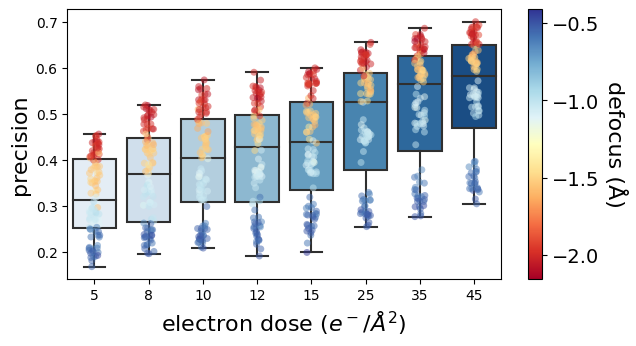

In [32]:
df_precision_LoG = df_precision_all.groupby("jobtype").get_group("LoG")

fig, ax = plt.subplots(figsize=(7, 3.5))
# create stripplot for precision per exposure, with different columns for different metadata files
sns.stripplot(x="exposure", y="precision", hue="defocus", data=df_precision_LoG, ax=ax, jitter=0.1, dodge=False, alpha=0.5, legend=False, palette="RdYlBu")
sns.boxplot(x="exposure", y="precision", hue="exposure", data=df_precision_LoG, ax=ax, dodge=False, palette="Blues")

ax.set_xlabel("electron dose ($e^-$/$\AA^2$)", fontsize=16)
ax.set_ylabel("precision", fontsize=16)
sm = plt.cm.ScalarMappable(
    cmap="RdYlBu",
    norm=plt.Normalize(
        vmin=df_precision["defocus"].min()/10000,
        vmax=df_precision["defocus"].max()/10000,
    ),
)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("defocus (Å)", rotation=270, labelpad=20, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax.legend().remove()

fig.savefig(os.path.join(figures_dir, "precision_vs_exposure.pdf"), bbox_inches="tight")

## panel E
plotting the boxplot of particle picking recall as a function of exposure

saved plot to /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/figures/recall_vs_exposure.pdf


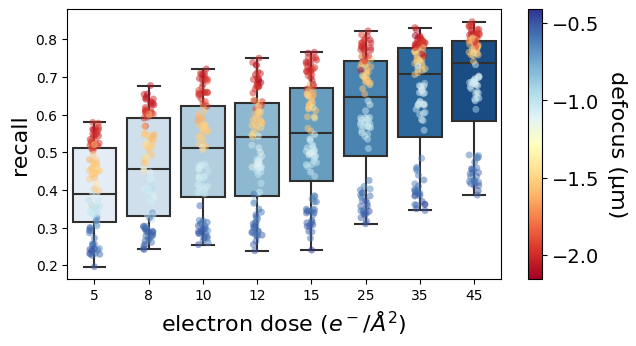

In [36]:
# sort df_precision_all by exposure
df_precision_LoG = df_precision_all.groupby("jobtype").get_group("LoG")

fig, ax = plt.subplots(figsize=(7, 3.5))
# create stripplot for precision per exposure, with different columns for different metadata files
sns.stripplot(x="exposure", y="recall", hue="defocus", data=df_precision_LoG, ax=ax, jitter=0.1, dodge=False, alpha=0.5, legend=False, palette="RdYlBu")
sns.boxplot(x="exposure", y="recall", hue="exposure", data=df_precision_LoG, ax=ax, dodge=False, palette="Blues")

ax.set_xlabel("electron dose ($e^-$/$\AA^2$)", fontsize=16)
ax.set_ylabel("recall", fontsize=16)
sm = plt.cm.ScalarMappable(
    cmap="RdYlBu",
    norm=plt.Normalize(
        vmin=df_precision["defocus"].min()/10000,
        vmax=df_precision["defocus"].max()/10000,
    ),
)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("defocus (\u03BCm)", rotation=270, labelpad=20, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax.legend().remove()

fig.savefig(os.path.join(figures_dir, "recall_vs_exposure.pdf"), bbox_inches="tight")
print(f"saved plot to {os.path.join(figures_dir, 'recall_vs_exposure.pdf')}")



## panel F
Plot of the average distance between a picked particle and the closest truth particle. This acts as a measurement of the accuracy of the particle picking. The data gets filtered to only include TP particles (i.e. particles that are within 1 particle radius of a truth particle). Because of this, the increase in average distance cannot be explained by more FP particle picks, and only by less precise picking of good particles.

In [5]:
project_dir = "/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison"
figures_dir = os.path.join(project_dir, "figures")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True # prints out progress statements
ignore_missing_files = True # if .mrc files are missing, the analysis will still be performed
enable_tqdm = True # enables tqdm progress bars

data = {
    0: {
        "exposure": 45,
        "LoG": "job004",
        "Class2D": "job005",
        "topaz": "job010",
        "homogeneous": "job016"
    },
    1: {
        "exposure": 35,
        "LoG": "job037",
        "Class2D": "job038",
        "topaz": "job042",
        "homogeneous": "job048"
    },
    2: {
        "exposure": 25,
        "LoG": "job054",
        "Class2D": "job055",
        "topaz": "job059",
        "homogeneous": "job065"
    },
    3: {
        "exposure": 15,
        "LoG": "job071",
        "Class2D": "job072",
        "topaz": "job076",
        "homogeneous": "job082"
    },
    4: {
        "exposure": 5,
        "LoG": "job088",
        "Class2D": "job089",
        "topaz": None,
        "homogeneous": None
    },
    5: {
        "exposure": 10,
        "LoG": "job093",
        "Class2D": "job094",
        "topaz": None,
        "homogeneous": None
    },
    6: {
        "exposure": 12,
        "LoG": "job098",
        "Class2D": "job099",
        "topaz": None,
        "homogeneous": None
    },
        7: {
        "exposure": 8,
        "LoG": "job114",
        "Class2D": "job115",
        "topaz": None,
        "homogeneous": None,
    },
}

for key, item in data.items():
    exposure = f"{item['exposure']}".zfill(2)
    config_dir = os.path.join(project_dir, f"mrc_epa_{exposure}")
    print(config_dir)
    meta_files = [
        os.path.join(project_dir, "Extract", item["LoG"], "particles.star"),
        # os.path.join(project_dir, "Class2D", item["Class2D"], "run_it025_data.star"),
    ]
    jobtypes = {
        os.path.join(project_dir, "Extract", item["LoG"], "particles.star"): "LoG",
        os.path.join(project_dir, "Class2D", item["Class2D"], "run_it025_data.star"): "Class2D",
    }
    if item["topaz"]:
        meta_files.append(os.path.join(project_dir, "Extract", item["topaz"], "particles.star"))
        jobtypes[os.path.join(project_dir, "Extract", item["topaz"], "particles.star")] = "topaz"
    if item["homogeneous"]:
        meta_files.append(os.path.join(project_dir, "Refine3D", item["homogeneous"], "run_data.star"))
        jobtypes[os.path.join(project_dir, "Refine3D", item["homogeneous"], "run_data.star")] = "homogeneous"

    for i, meta_file in enumerate(meta_files):
        if i == 0:
            analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
        else:
            analysis.add_data(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file
    
    df_picked = pd.DataFrame(analysis.results_picking)
    df_truth = pd.DataFrame(analysis.results_truth)

    # compute precision and recall
    df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)

    # add a column to the picked data frame that indicates exposure
    df_picked["exposure"] = item["exposure"]
    df_precision["exposure"] = item["exposure"]

    df_overlap = analysis.compute_overlap(df_picked, df_truth, verbose=verbose)

    # add a column to the overlap data frame that indicates exposure
    df_overlap["exposure"] = item["exposure"]

    if key == 0:
        df_precision_all = df_precision
        df_picked_all = df_picked
        df_overlap_all = df_overlap
        df_truth_all = df_truth
    else:
        df_precision_all = pd.concat([df_precision_all, df_precision])
        df_picked_all = pd.concat([df_picked_all, df_picked])
        df_overlap_all = pd.concat([df_overlap_all, df_overlap])
        df_truth_all = pd.concat([df_truth_all, df_truth])

jobtypes_all = {}
for value in data.values():
    jobtypes_all[value["LoG"]] = "LoG"
    # jobtypes_all[value["Class2D"]] = "Class2D"
    if value["topaz"]:
        jobtypes_all[value["topaz"]] = "topaz"
    if value["homogeneous"]:
        jobtypes_all[value["homogeneous"]] = "homogeneous"
df_precision_all["job"] = df_precision_all["metadata_filename"].apply(lambda x: x.split("/")[-2])
df_precision_all["jobtype"] = df_precision_all["job"].map(jobtypes_all)
df_picked_all["job"] = df_picked_all["metadata_filename"].apply(lambda x: x.split("/")[-2])
df_picked_all["jobtype"] = df_picked_all["job"].map(jobtypes_all)

/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_45
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job004/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job004/particles.star. determined file type: star


Dictionaries now contain 35912 reconstructed particles
added 35912 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job004/particles.star


loading truth data: 100%|██████████| 100/100 [00:25<00:00,  3.85it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 35912 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_45
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job010/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job010/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 108600 reconstructed particles
added 72688 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job010/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job016/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job016/run_data.star. determined file type: star
checking if u

computing precision: 100%|██████████| 300/300 [00:34<00:00,  8.58it/s, precision=0.919, recall=0.966, multiplicity=0.973]


time taken to compute precision: 35.253501176834106


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 223.33it/s, neighbours_truth=252, neighbours_picked=418]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_35
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job037/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job037/particles.star. determined file type: star


Dictionaries now contain 35948 reconstructed particles
added 35948 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job037/particles.star


loading truth data: 100%|██████████| 100/100 [00:26<00:00,  3.80it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 35948 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_35
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job042/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job042/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 105057 reconstructed particles
added 69109 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job042/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job048/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job048/run_data.star. determined file type: star
checking if u

computing precision: 100%|██████████| 300/300 [00:34<00:00,  8.77it/s, precision=0.981, recall=0.893, multiplicity=0.9]  


time taken to compute precision: 34.50315546989441


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 219.85it/s, neighbours_truth=253, neighbours_picked=344]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_25
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job054/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job054/particles.star. determined file type: star


Dictionaries now contain 36250 reconstructed particles
added 36250 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job054/particles.star


loading truth data: 100%|██████████| 100/100 [00:25<00:00,  3.85it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36250 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_25
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job059/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job059/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 115395 reconstructed particles
added 79145 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job059/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job065/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job065/run_data.star. determined file type: star
checking if u

computing precision: 100%|██████████| 300/300 [00:37<00:00,  7.95it/s, precision=0.963, recall=0.897, multiplicity=0.91] 


time taken to compute precision: 38.063406467437744


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 216.98it/s, neighbours_truth=224, neighbours_picked=340]   


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_15
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job071/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job071/particles.star. determined file type: star


Dictionaries now contain 36346 reconstructed particles
added 36346 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job071/particles.star


loading truth data: 100%|██████████| 100/100 [00:26<00:00,  3.85it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36346 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_15
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job076/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job076/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 95714 reconstructed particles
added 59368 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job076/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job082/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job082/run_data.star. determined file type: star
checking if ug

computing precision: 100%|██████████| 300/300 [00:29<00:00, 10.16it/s, precision=0.97, recall=0.655, multiplicity=0.663] 


time taken to compute precision: 29.712868452072144


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 231.33it/s, neighbours_truth=227, neighbours_picked=250]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_05
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job088/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job088/particles.star. determined file type: star


Dictionaries now contain 36201 reconstructed particles
added 36201 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job088/particles.star


loading truth data: 100%|██████████| 100/100 [00:26<00:00,  3.83it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36201 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_05
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:09<00:00, 10.29it/s, precision=0.426, recall=0.544, multiplicity=0.563]


time taken to compute precision: 9.876138925552368


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 223.16it/s, neighbours_truth=213, neighbours_picked=406]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_10
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job093/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job093/particles.star. determined file type: star


Dictionaries now contain 36415 reconstructed particles
added 36415 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job093/particles.star


loading truth data: 100%|██████████| 100/100 [00:26<00:00,  3.80it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36415 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_10
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:09<00:00, 10.66it/s, precision=0.53, recall=0.681, multiplicity=0.7]  


time taken to compute precision: 9.420782566070557


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 227.93it/s, neighbours_truth=258, neighbours_picked=414]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_12
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job098/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job098/particles.star. determined file type: star


Dictionaries now contain 36447 reconstructed particles
added 36447 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job098/particles.star


loading truth data: 100%|██████████| 100/100 [00:25<00:00,  3.87it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36447 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_12
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:09<00:00, 10.29it/s, precision=0.508, recall=0.637, multiplicity=0.657]


time taken to compute precision: 9.756091833114624


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 227.72it/s, neighbours_truth=243, neighbours_picked=414]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_08
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job114/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job114/particles.star. determined file type: star


Dictionaries now contain 36361 reconstructed particles
added 36361 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job114/particles.star


loading truth data: 100%|██████████| 100/100 [00:25<00:00,  3.92it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36361 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_08
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:09<00:00, 10.27it/s, precision=0.469, recall=0.609, multiplicity=0.63] 


time taken to compute precision: 9.775694847106934


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 223.71it/s, neighbours_truth=248, neighbours_picked=422]


saved image to /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/figures/distance_to_closest_particle_vs_exposure.pdf


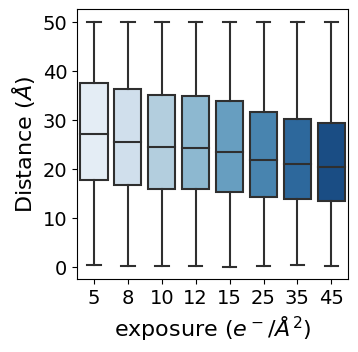

In [6]:
# plot the average distance to the closest particle as a function of exposure
df_picked_all["job"] = df_picked_all["metadata_filename"].apply(lambda x: x.split("/")[-2])
df_picked_all["jobtype"] = df_picked_all["job"].map(jobtypes_all)
df_picked_LoG = df_picked_all[df_picked_all["jobtype"] == "LoG"]
df_picked_LoG_TP = df_picked_LoG.groupby("TP").get_group(True)
fig, ax = plt.subplots(figsize=(3.5, 3.5))
# sns.violinplot(x="exposure", y="closest_dist", data=df_picked_LoG_TP, ax=ax, inner="quartile", palette="Blues", legend=False)
sns.boxplot(x="exposure", y="closest_dist", hue="exposure", data=df_picked_LoG_TP, ax=ax, palette="Blues", dodge=False)
# sns.stripplot(x="exposure", y="closest_dist", data=df_picked_LoG_TP, ax=ax, jitter=0.1, dodge=True, alpha=0.5, color="k")
ax.set_xlabel("exposure ($e^-$/$\AA^2$)", fontsize=16)
ax.set_ylabel("Distance ($\AA$)", fontsize=16)
ax.tick_params(labelsize=14)
ax.legend().remove()

# fig.savefig(os.path.join(figures_dir, "distance_to_closest_particle_vs_exposure.pdf"), bbox_inches="tight")
print(f"saved image to {os.path.join(figures_dir, 'distance_to_closest_particle_vs_exposure.pdf')}")


### old figure. plots several simulated micrographs with different defocus values with the particles in the same location and orientation.

In [14]:
# load in and plot the example micrographs for all defocus and exposure conditions
# the defocus values used are: [-2.0, -1.5, -1.0, -0.5] um
# the exposure values used are: [45.0, 30.0, 15.0] e/A^2
datadir = "/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/supplementary_figure"

defocus_list = [-20000, -15000, -10000, -5000] # in A
exposure_list = [45, 30, 15] # in e/A^2

for exposure in exposure_list:
    dirname = os.path.join(datadir, "mrc_epa_{:.1f}".format(exposure))
    for defocus in defocus_list:
        filename = os.path.join(dirname, "epa_{:.1f}_defocus_{:.1f}.mrc".format(exposure, defocus))
        normed_image = mrc_thumbnail(
            in_mrc=filename,
            new_size=512,
        )
        fig, ax = plt.subplots(figsize=(7.5, 7.5))
        ax.imshow(normed_image, cmap="gray")
        ax.axis("off")
        fig.savefig(filename.replace(".mrc", ".png"), dpi=600, bbox_inches="tight")
        fig.clf()
    


<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>

<Figure size 750x750 with 0 Axes>